

**House price predicition**


Dataset content :

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:


longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [29]:
data = pd.read_csv('housing.csv')

In [30]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
data.dropna(inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB



For now, we are going to split the data into training and testing datasets, and then we will further split it into X and Y data.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 )

In [37]:
train_data = X_train.join(y_train)

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17938,-121.94,37.34,29.0,3377.0,853.0,1674.0,792.0,3.4233,<1H OCEAN,229300.0
14135,-117.07,32.75,9.0,3464.0,749.0,1687.0,645.0,3.3026,NEAR OCEAN,119100.0
8269,-118.16,33.77,30.0,4439.0,1105.0,1749.0,1011.0,3.8984,NEAR OCEAN,306300.0
4479,-118.16,34.07,41.0,247.0,55.0,925.0,50.0,3.5769,<1H OCEAN,135700.0
5444,-118.43,34.00,30.0,2148.0,597.0,1341.0,559.0,3.3995,<1H OCEAN,324000.0
...,...,...,...,...,...,...,...,...,...,...
19271,-122.82,38.44,23.0,1551.0,236.0,555.0,243.0,4.6792,<1H OCEAN,304700.0
1742,-122.35,37.96,36.0,2191.0,531.0,1563.0,524.0,2.5164,NEAR BAY,114200.0
16312,-121.33,38.00,32.0,4474.0,929.0,2177.0,884.0,3.2889,INLAND,98900.0
10941,-117.88,33.74,29.0,720.0,174.0,1045.0,181.0,3.1964,<1H OCEAN,151900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

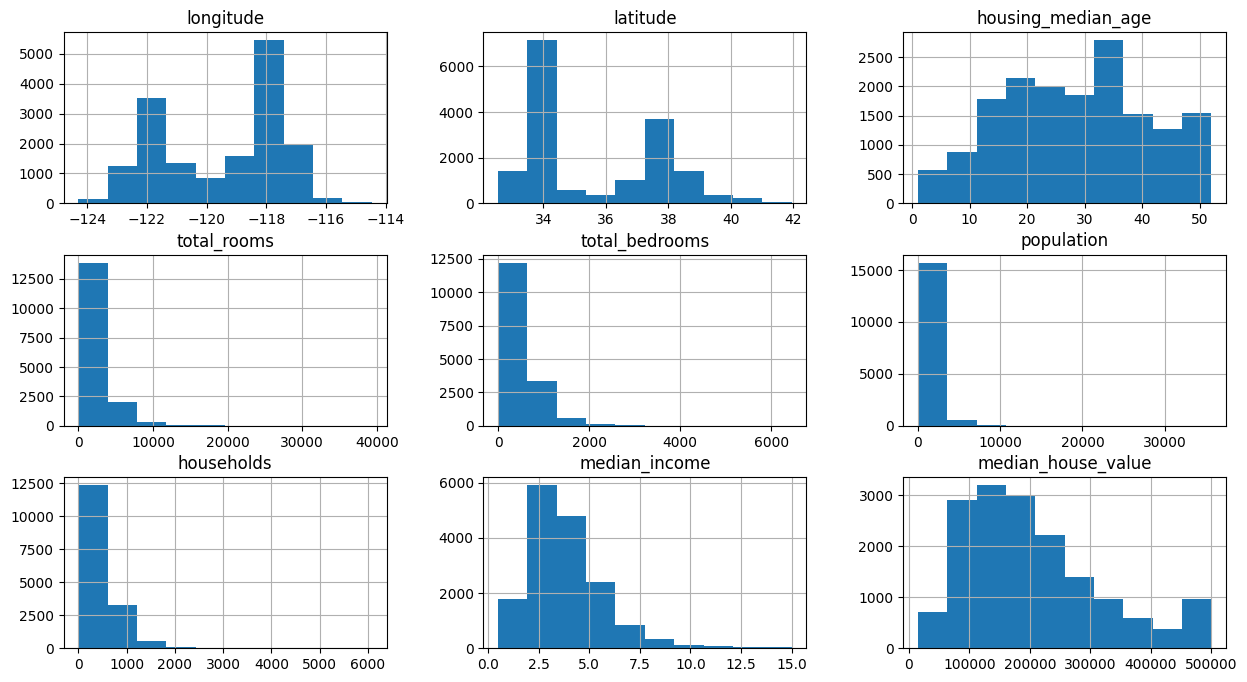

In [39]:
train_data.hist(figsize=(15, 8))

<ipython-input-40-9be60d6c3d82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')


<Axes: >

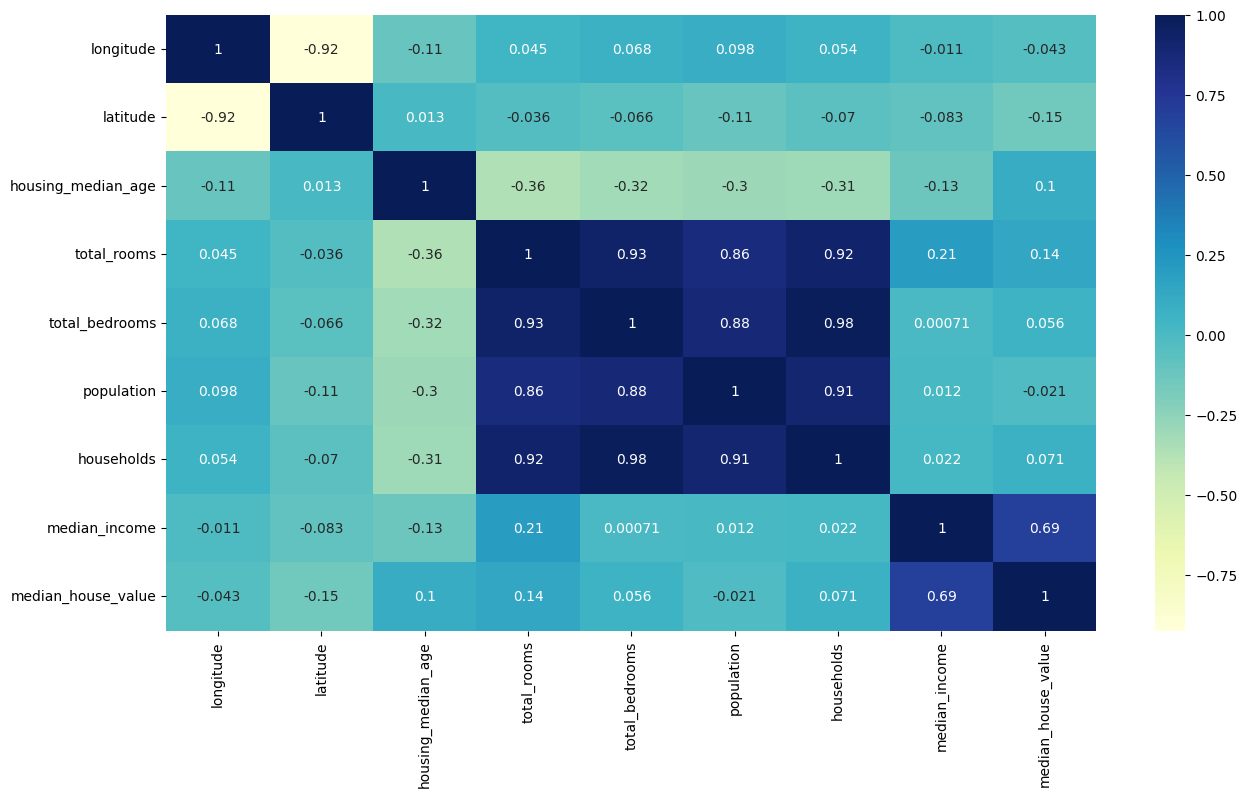

In [40]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')

**Data preprocessing**

In [41]:
#+1 is added in order to prevent zero values

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

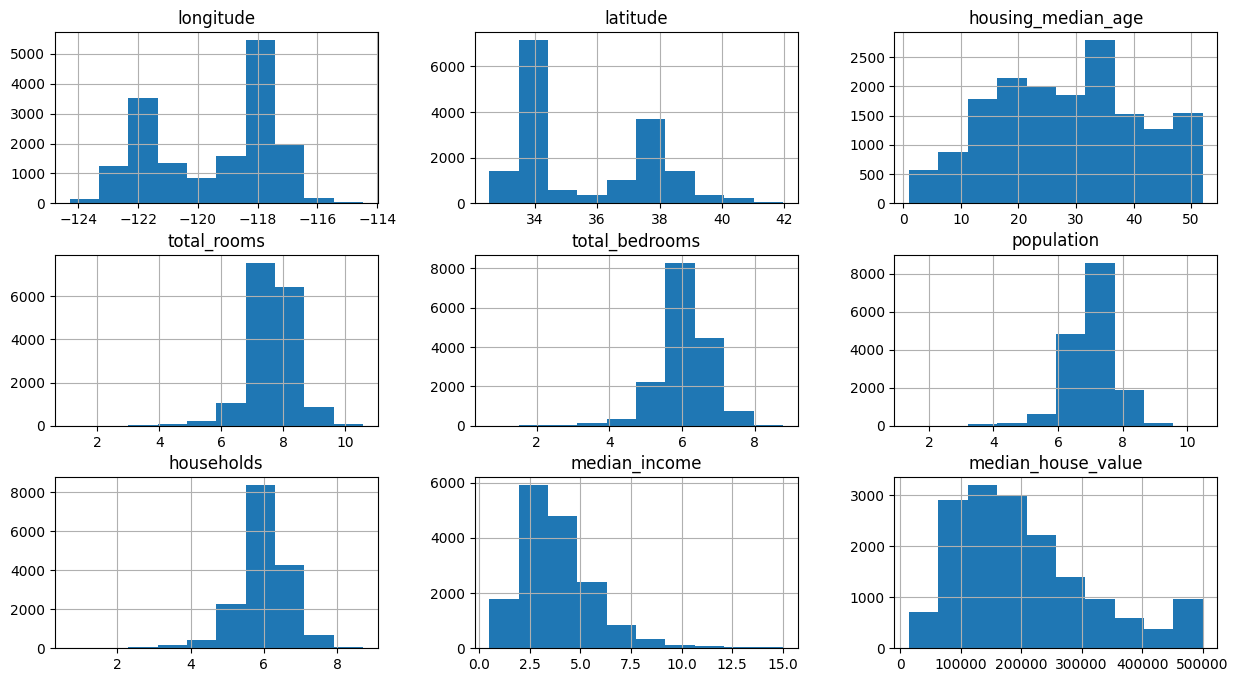

In [42]:
train_data.hist(figsize=(15, 8))

Now we should use the column with information about ocean proximity, as it is obvious to most people that the closer the house is to the ocean, the higher its cost, because it is a more desirable area than inland(rural) areas.

Теперь мы должны использовать столбец с информацией о близости к океану, так как это очевидно для большинства людей: чем ближе дом к океану, тем выше его стоимость, поскольку это более привлекательный район по сравнению с сельской местностью.

But as the information is stored as a string, we will have to convert it into a numerical value for modeling and prediction.


Но поскольку информация хранится в виде строки, нам придется преобразовать ее в числовое значение для моделирования и прогнозирования.

In [43]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [44]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17938,-121.94,37.34,29.0,8.125039,6.749931,7.423568,6.675823,3.4233,229300.0,1,0,0,0,0
14135,-117.07,32.75,9.0,8.150468,6.620073,7.431300,6.470800,3.3026,119100.0,0,0,0,0,1
8269,-118.16,33.77,30.0,8.398410,7.008505,7.467371,6.919684,3.8984,306300.0,0,0,0,0,1
4479,-118.16,34.07,41.0,5.513429,4.025352,6.830874,3.931826,3.5769,135700.0,1,0,0,0,0
5444,-118.43,34.00,30.0,7.672758,6.393591,7.201916,6.327937,3.3995,324000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19271,-122.82,38.44,23.0,7.347300,5.468060,6.320768,5.497168,4.6792,304700.0,1,0,0,0,0
1742,-122.35,37.96,36.0,7.692570,6.276643,7.355002,6.263398,2.5164,114200.0,0,0,0,1,0
16312,-121.33,38.00,32.0,8.406262,6.835185,7.686162,6.785588,3.2889,98900.0,0,1,0,0,0
10941,-117.88,33.74,29.0,6.580639,5.164786,6.952729,5.204007,3.1964,151900.0,1,0,0,0,0


<Axes: >

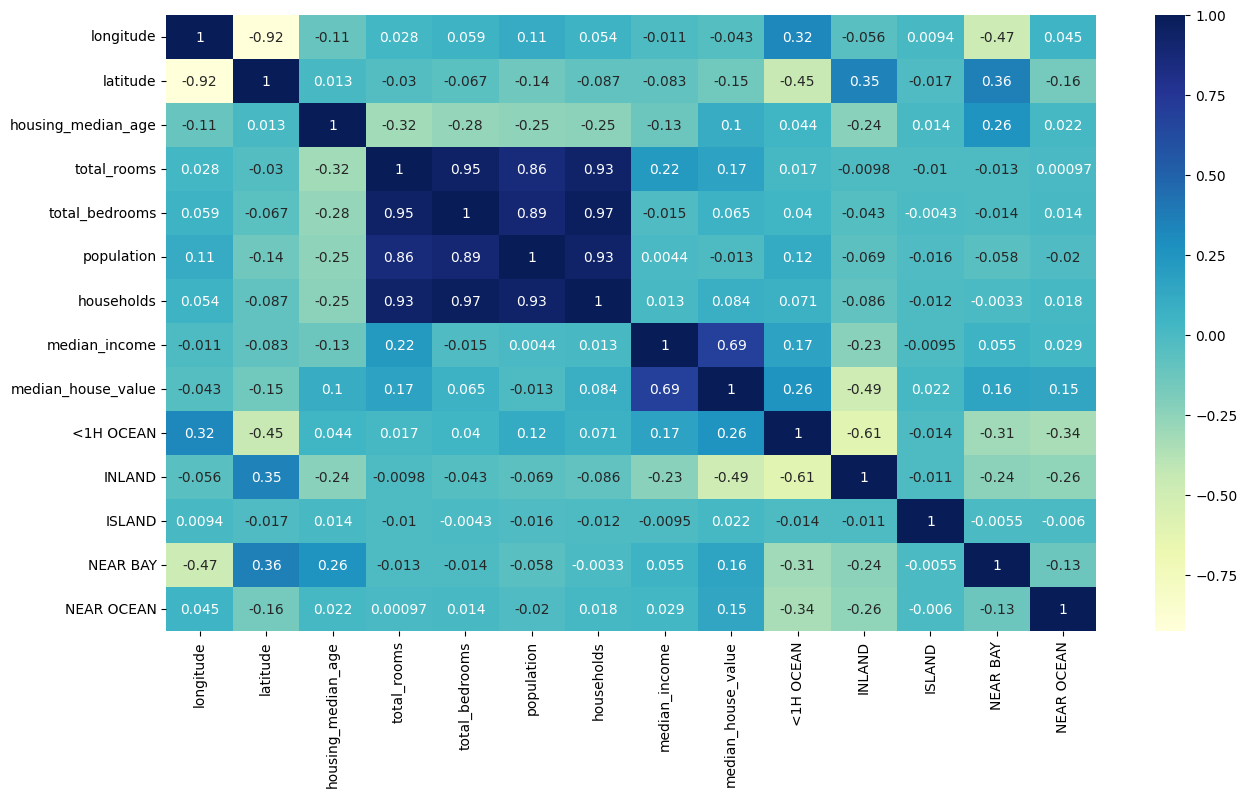

In [45]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')


We see that the information is stored as <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND. Instead of assigning variables to them, we will create a new feature for each of them and assign a value of 1 or 0.

(<1H OCEAN: This feature represents if the location is less than one hour away from the ocean (yes), so it will be assigned a value of 1).



Мы видим, что информация хранится как <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND. Вместо назначения переменных для них, мы создадим новый признак для каждого и присвоим им значение 1 или 0.

(<1H OCEAN: Этот признак представляет, находится ли местоположение в пределах часа езды от океана (да), поэтому ему будет присвоено значение 1).

<Axes: xlabel='latitude', ylabel='longitude'>

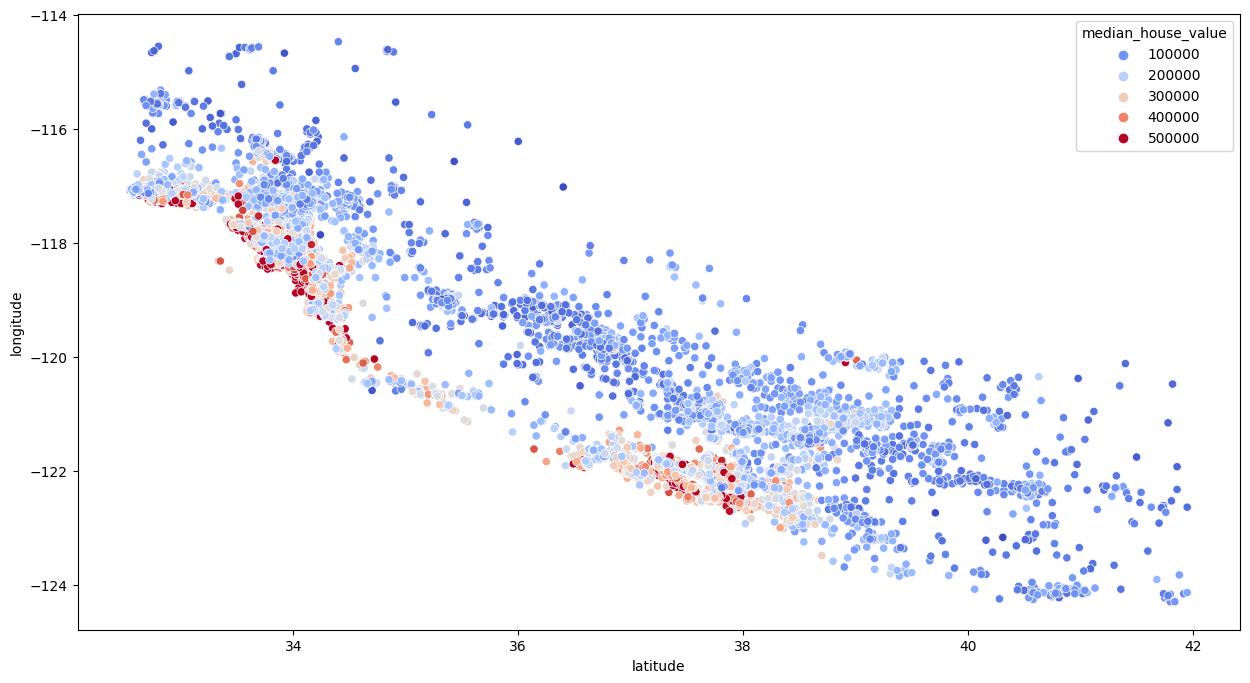

In [46]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue = "median_house_value", palette ='coolwarm')

The more red it gets the more expensive the house is, the more blue it is the less expensive the house is

In [47]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

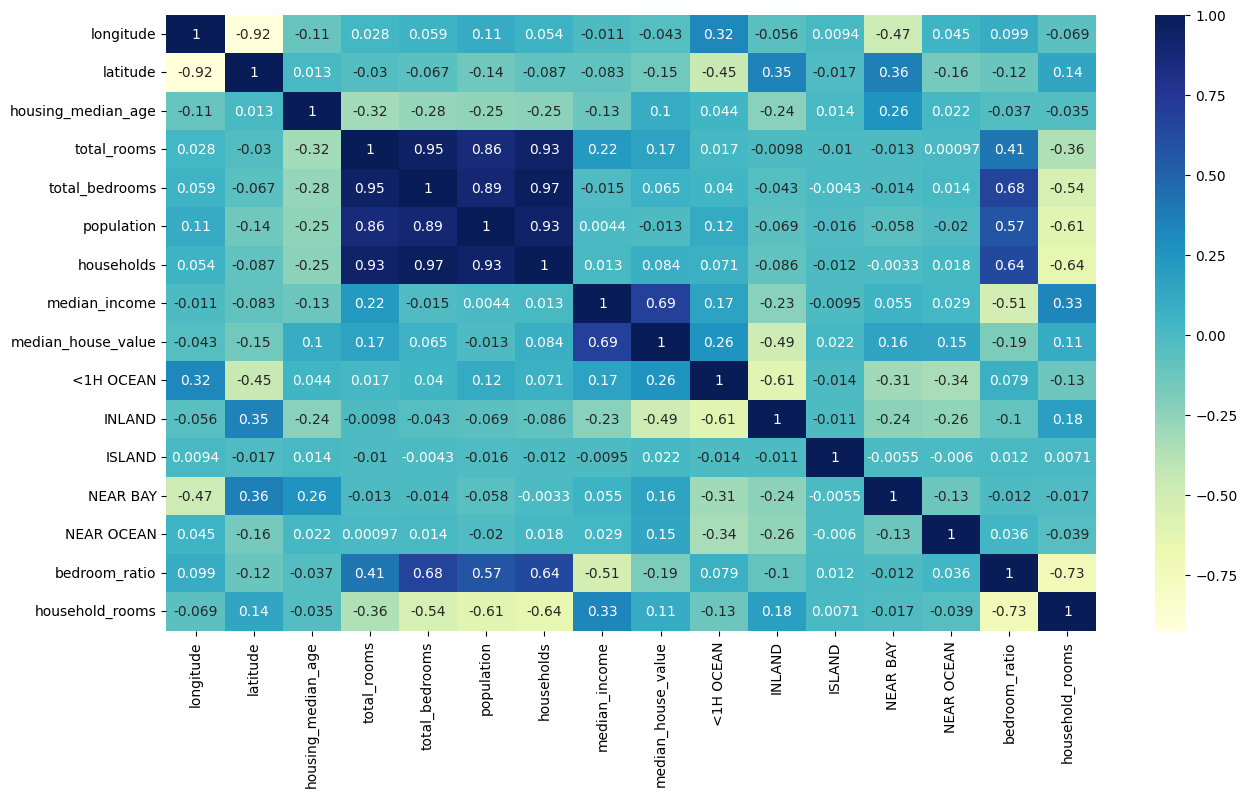

In [48]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')

Starting with Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s =scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [50]:
test_data = X_test.join(y_test)
#+1 is added in order to prevent zero values

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']




In [51]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [52]:
reg.score(X_test, y_test)

0.6600649063765842

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
forest.score(X_test, y_test)

0.8111630832252327